# Exploring the Data

## Importing Necessary libraries

In [63]:
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 70)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from tqdm import tqdm_notebook as tqdm
import _pickle as pickle

### Loading the Data

In [64]:
with open("final_df.pickle",'rb') as fp:
    final_df = pickle.load(fp)

### Function to plot each feature

In [65]:
def plot_features_bar(df, col, percent_change=0):
    """
    Bar graph totaling True and False values for any column selected
    """
    if col != 'price_will_increase?':
        plt.figure(figsize=(4,3))
        plt.style.use('ggplot')

        df[df[col]>percent_change]['price_will_increase?'].value_counts().plot(kind='bar')

        plt.xticks(rotation=0)
        plt.title(f"{col} when Positive")
        plt.show()

#### Visualizing the count of True and False
Visual check for any class imbalance

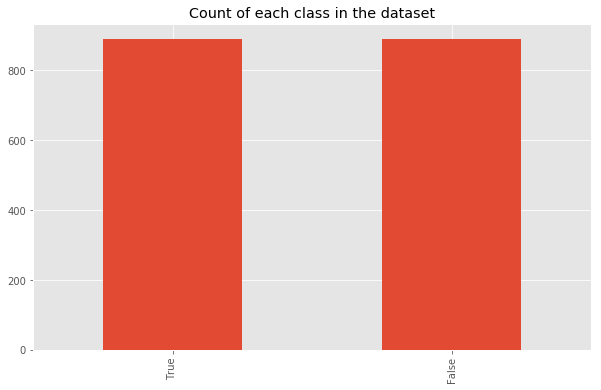

In [71]:
plt.figure(figsize=(10,6))

final_df['price_will_increase?'].value_counts().plot(kind='bar')

plt.title('Count of each class in the dataset')
plt.savefig('class_equality.png')
plt.show()

### Plotting specific features
Count of True and False when features are positive

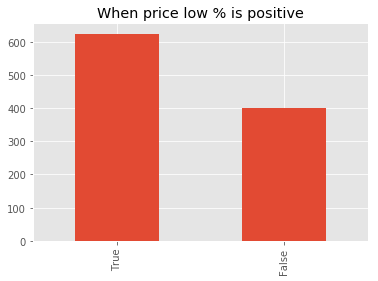

In [97]:
final_df[final_df['Price low %-increase']>0]['price_will_increase?'].value_counts().plot(kind='bar')
plt.title('When price low % is positive')
plt.savefig('plow.png')
plt.show()

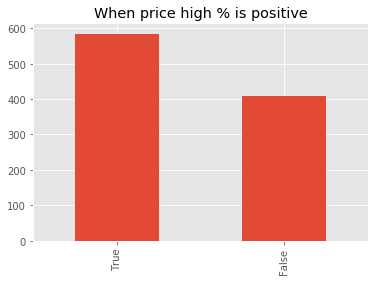

In [98]:
final_df[final_df['Price high %-increase']>0]['price_will_increase?'].value_counts().plot(kind='bar')
plt.title('When price high % is positive')
plt.savefig('phigh.png')
plt.show()

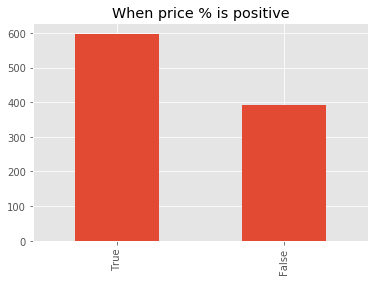

In [99]:
final_df[final_df['Price %-increase']>0]['price_will_increase?'].value_counts().plot(kind='bar')
plt.title('When price % is positive')
plt.savefig('price.png')
plt.show()

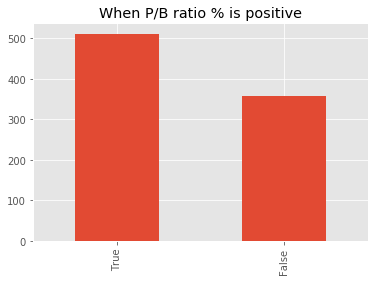

In [100]:
final_df[final_df['P/B ratio %-increase']>0]['price_will_increase?'].value_counts().plot(kind='bar')
plt.title('When P/B ratio % is positive')
plt.savefig('pbratio.png')
plt.show()

### Plotting all features 
Interpreted as how many time the price will increase when the selected feature improved over the last quarter.

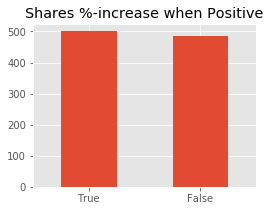

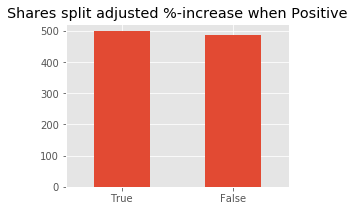

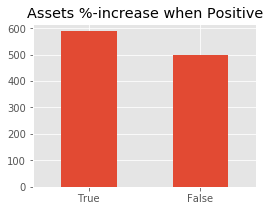

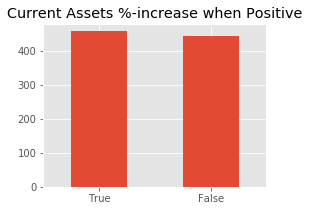

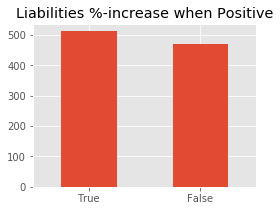

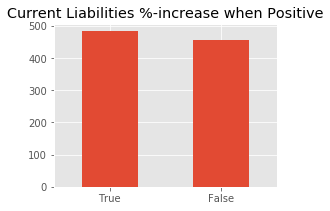

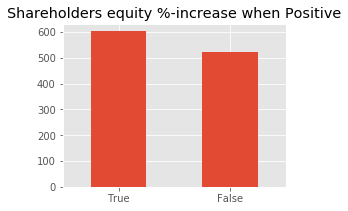

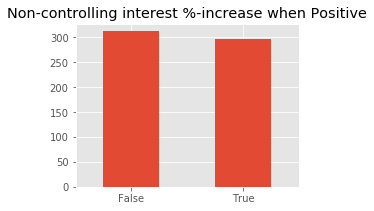

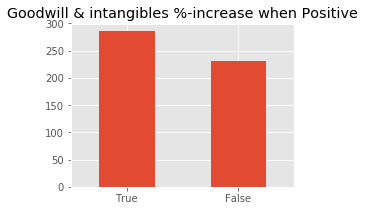

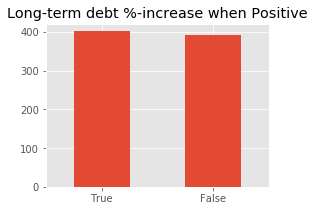

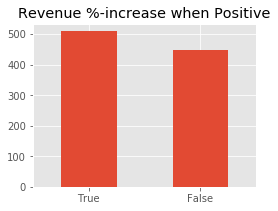

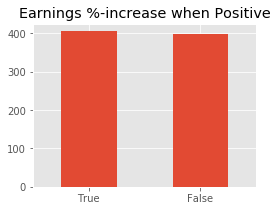

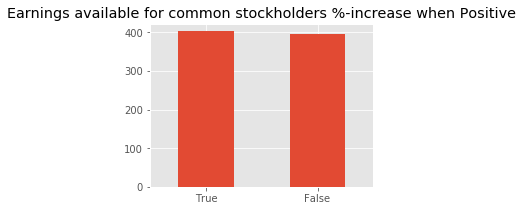

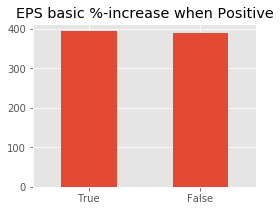

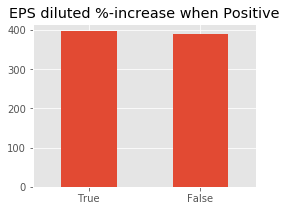

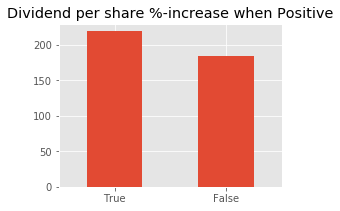

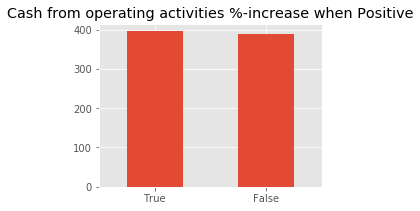

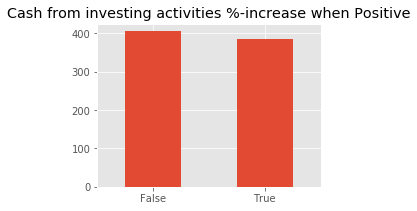

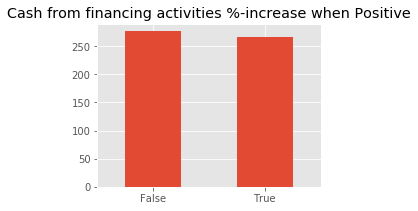

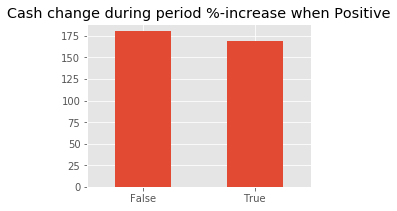

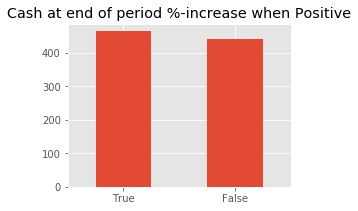

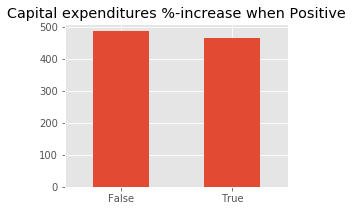

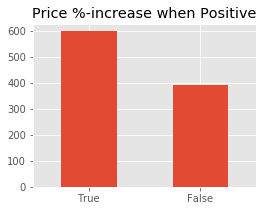

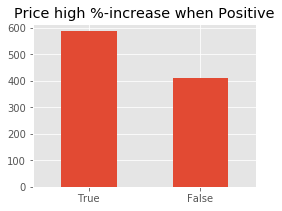

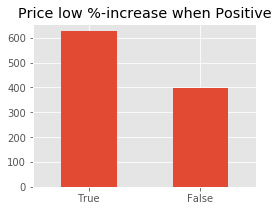

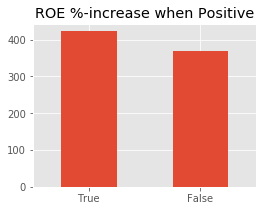

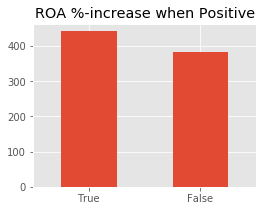

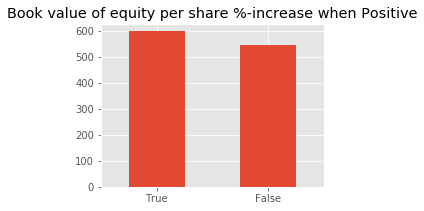

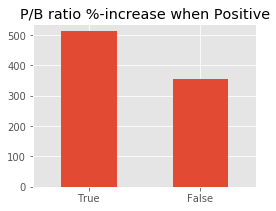

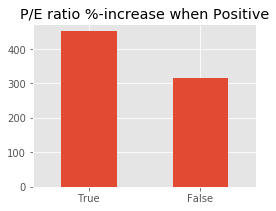

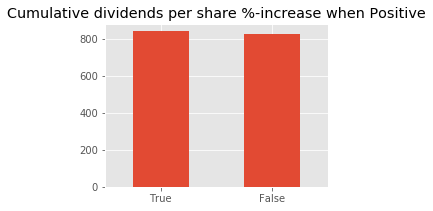

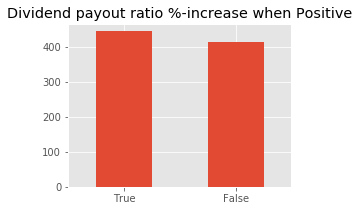

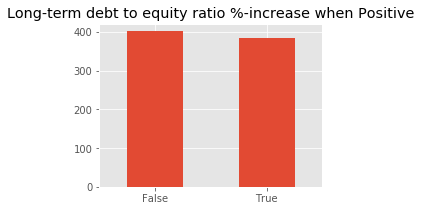

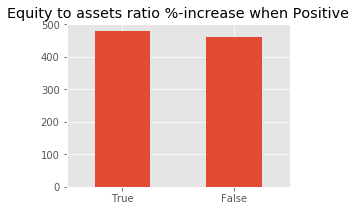

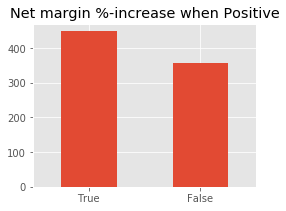

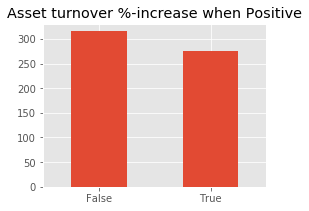

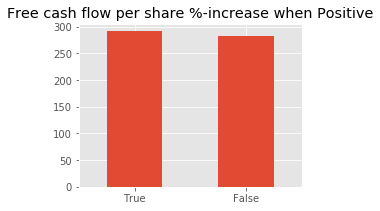

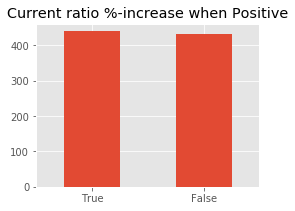

In [81]:
for i in final_df.columns:
    plot_features_bar(final_df, i)

### Correlation
Checking for any correlation between the future price outcome and the features.

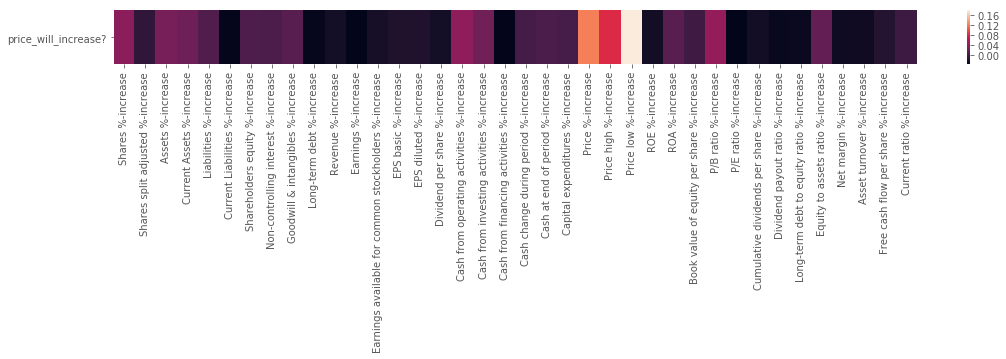

In [83]:
# Correlation DF
corr = final_df.corr().iloc[[0],1:]

#Plotting the Correlation DF as a heatmap
plt.figure(figsize=(18,1))
sns.heatmap(corr, annot=False)
plt.xticks()
plt.yticks(rotation=0)
plt.savefig('featcorr.png')
plt.show()

### Distribution of each feature

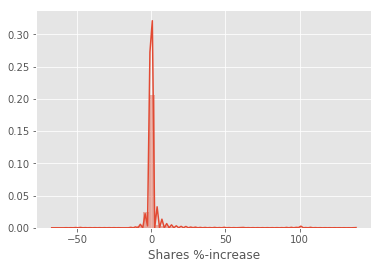

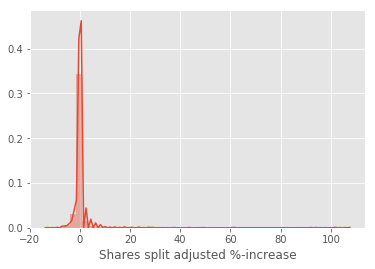

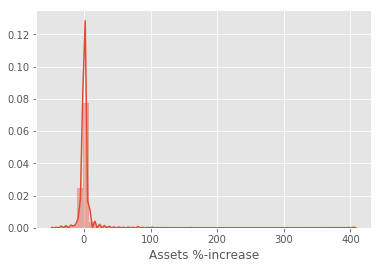

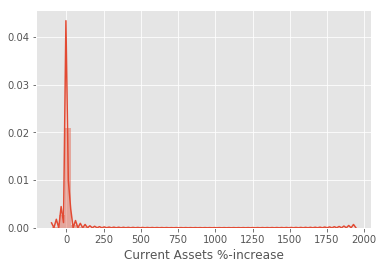

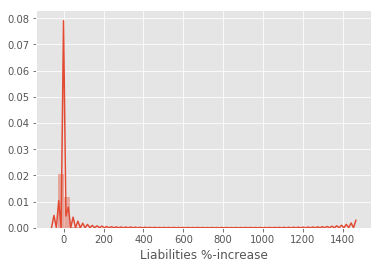

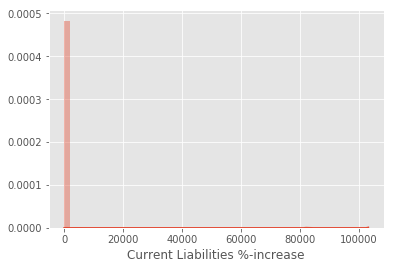

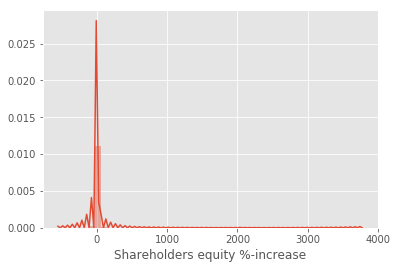

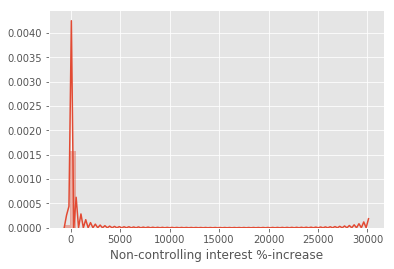

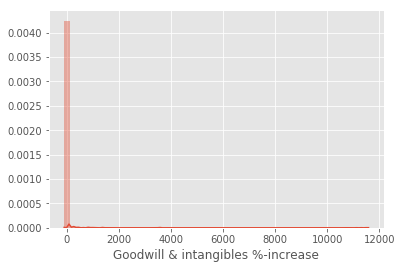

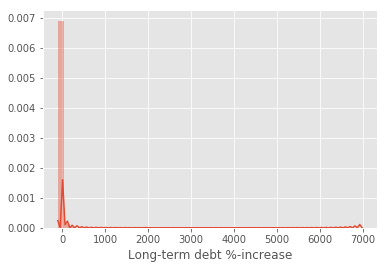

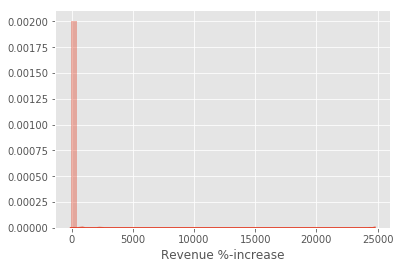

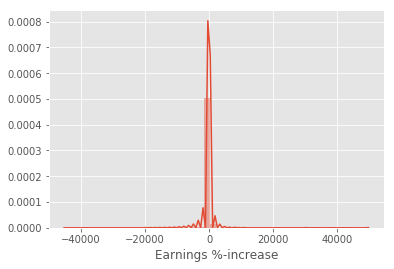

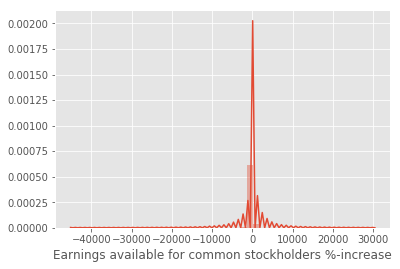

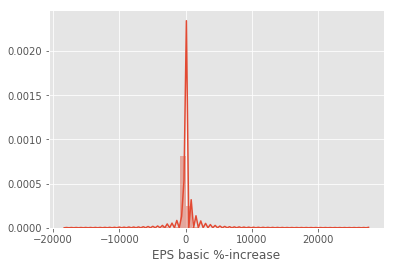

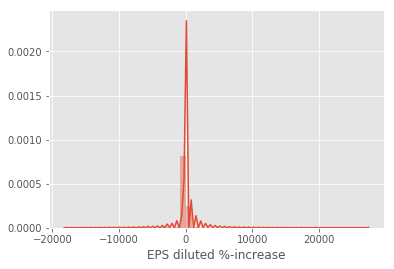

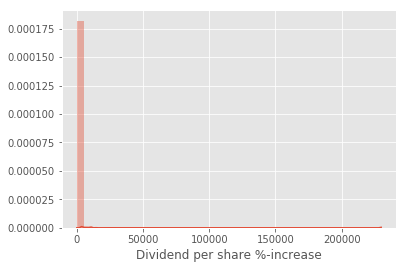

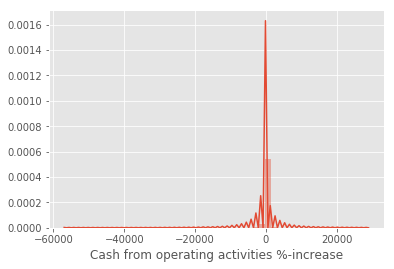

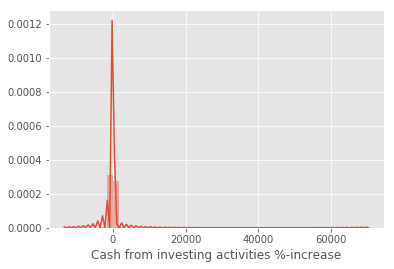

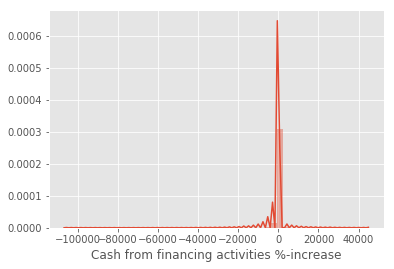

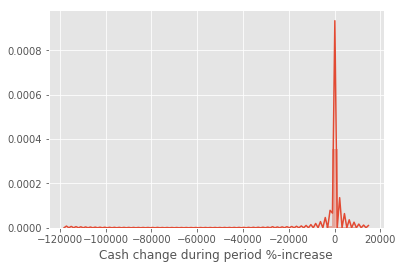

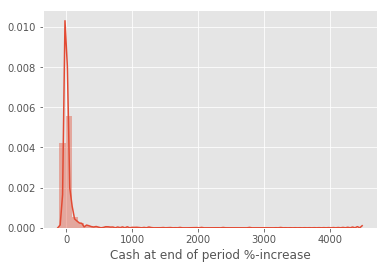

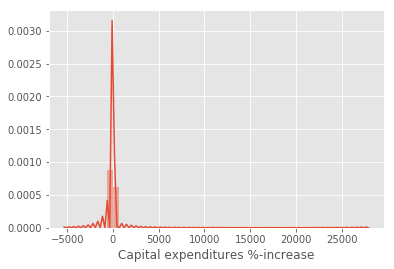

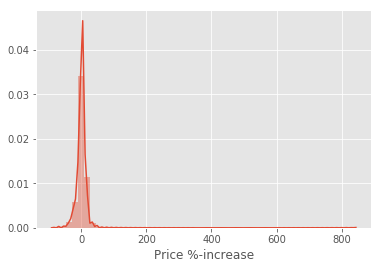

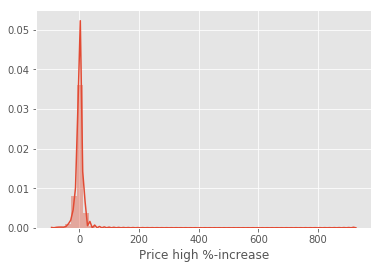

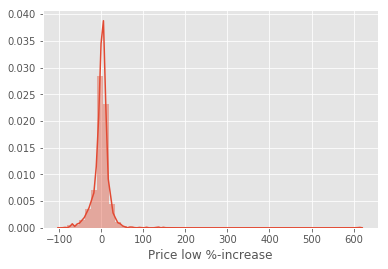

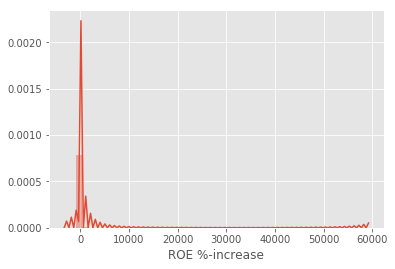

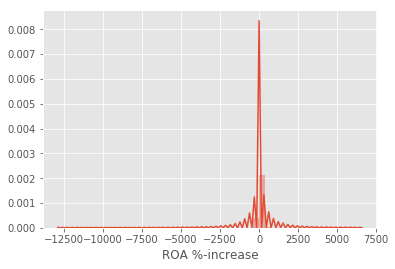

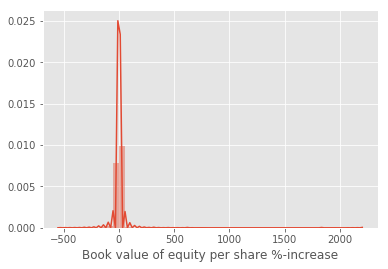

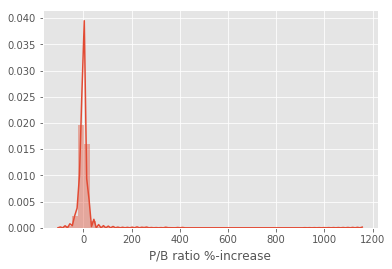

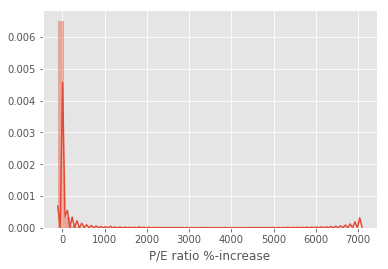

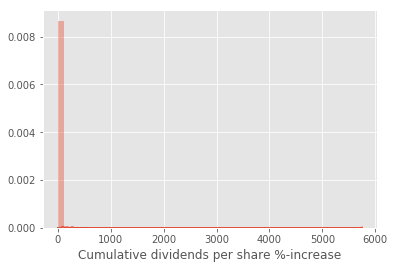

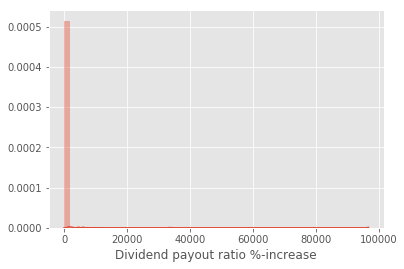

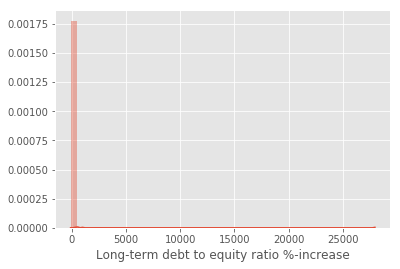

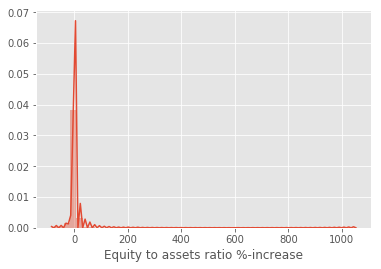

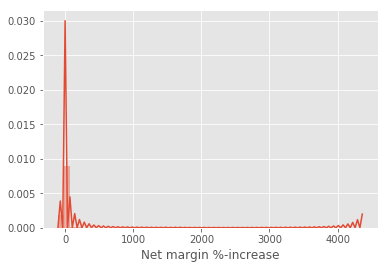

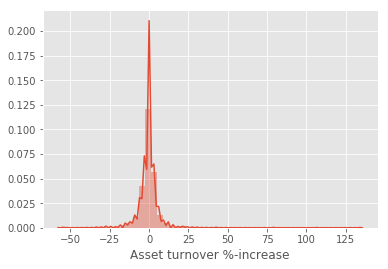

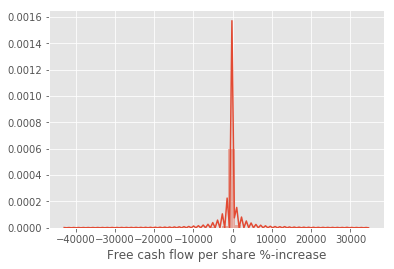

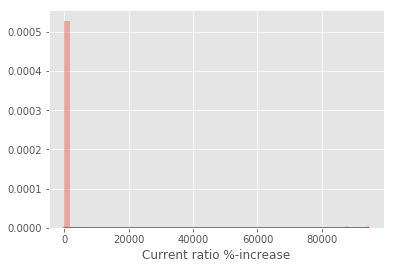

In [70]:
for i in final_df.columns[1:]:
    plt.figure(figsize=(6,4))
    sns.distplot(final_df[i])
    plt.show()